In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# importing libraries
import tensorflow
import keras
import os
import glob
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset_dir = '/content/drive/MyDrive/Brain tumor detection 400 images'

In [ ]:
image_width, image_height = 256, 256
batch_size = 32

In [ ]:
dataset_path = '/content/drive/MyDrive/Brain tumor detection 400 images'
class_names = ['yes','no']

# apply glob module to retrieve files/pathnames

img_path = os.path.join(dataset_path, class_names[1], '*')
print(img_path)
img_path = glob.glob(img_path)
print(img_path)

/content/drive/MyDrive/Brain tumor detection 400 images/no/*
['/content/drive/MyDrive/Brain tumor detection 400 images/no/no157.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no414.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no342.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no102.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no391.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no388.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no318.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no68.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no20.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no387.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no305.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no397.jpg', '/content/drive/MyDrive/Brain tumor detection 400 images/no/no324.jpg', '/co

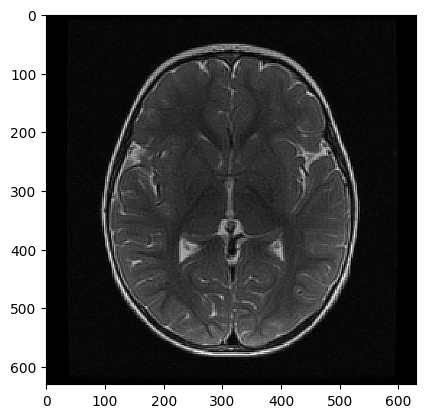

In [ ]:
# accessing an image file from the dataset classes
image = io.imread(img_path[7])
image1 = io.imread(img_path[4])
# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

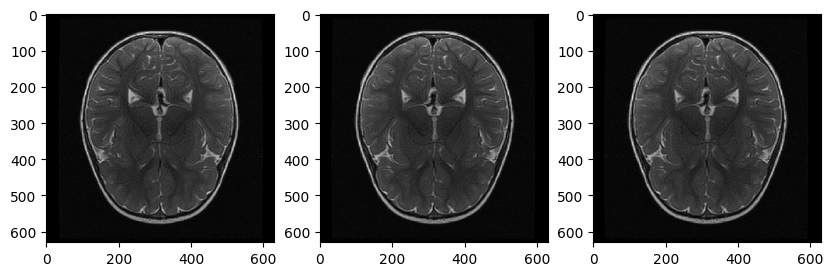

In [ ]:

from numpy import expand_dims
#from keras.preprocessing.image import load_img
from keras.utils import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(image)

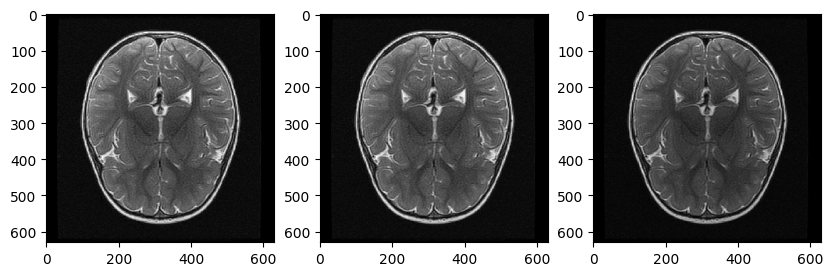

In [ ]:
from numpy import expand_dims
#from keras.preprocessing.image import load_img
from keras.utils import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# ImageDataGenerator for brightness
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(image)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

test_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.3)

training_set=train_datagen.flow_from_directory(
         '/content/drive/MyDrive/Brain tumor detection 400 images',
          target_size=(224,224),
          batch_size=32,
          class_mode='binary',
          subset='training')

test_set=test_datagen.flow_from_directory(
         '/content/drive/MyDrive/Brain tumor detection 400 images',
          target_size=(224,224),
          batch_size=32,
          class_mode='binary',
          subset='validation')


Found 328 images belonging to 2 classes.
Found 123 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
#import tensorlow as tf
from keras.optimizers import Adam
rmodel = keras.applications.MobileNetV2()
new_model=Sequential()
new_model.add(rmodel)
new_model.add(Dropout(0.5))
new_model.add(Dense(1,activation='sigmoid'))
new_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1000)              3538984   
 tional)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 3539985 (13.50 MB)
Trainable params: 3505873 (13.37 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [ ]:
#from Ipython.display import display
from PIL import Image
hist=new_model.fit(
    training_set,
    steps_per_epoch=training_set.samples//32,
    epochs=100,
    validation_data=test_set,
    validation_steps=test_set.samples//32)

Epoch 1/100
10/10 [==============================] - 33s 710ms/step - loss: 0.6866 - accuracy: 0.7399 - val_loss: 0.6843 - val_accuracy: 0.6042
Epoch 2/100
10/10 [==============================] - 5s 526ms/step - loss: 0.6707 - accuracy: 0.7804 - val_loss: 0.6737 - val_accuracy: 0.7708
Epoch 3/100
10/10 [==============================] - 7s 677ms/step - loss: 0.6634 - accuracy: 0.7297 - val_loss: 0.6714 - val_accuracy: 0.7500
Epoch 4/100
10/10 [==============================] - 6s 591ms/step - loss: 0.6575 - accuracy: 0.7128 - val_loss: 0.6471 - val_accuracy: 0.9375
Epoch 5/100
10/10 [==============================] - 7s 663ms/step - loss: 0.6607 - accuracy: 0.6757 - val_loss: 0.6605 - val_accuracy: 0.7812
Epoch 6/100
10/10 [==============================] - 5s 518ms/step - loss: 0.6613 - accuracy: 0.6655 - val_loss: 0.6733 - val_accuracy: 0.6771
Epoch 7/100
10/10 [==============================] - 6s 587ms/step - loss: 0.6578 - accuracy: 0.6554 - val_loss: 0.6930 - val_accuracy: 0.520

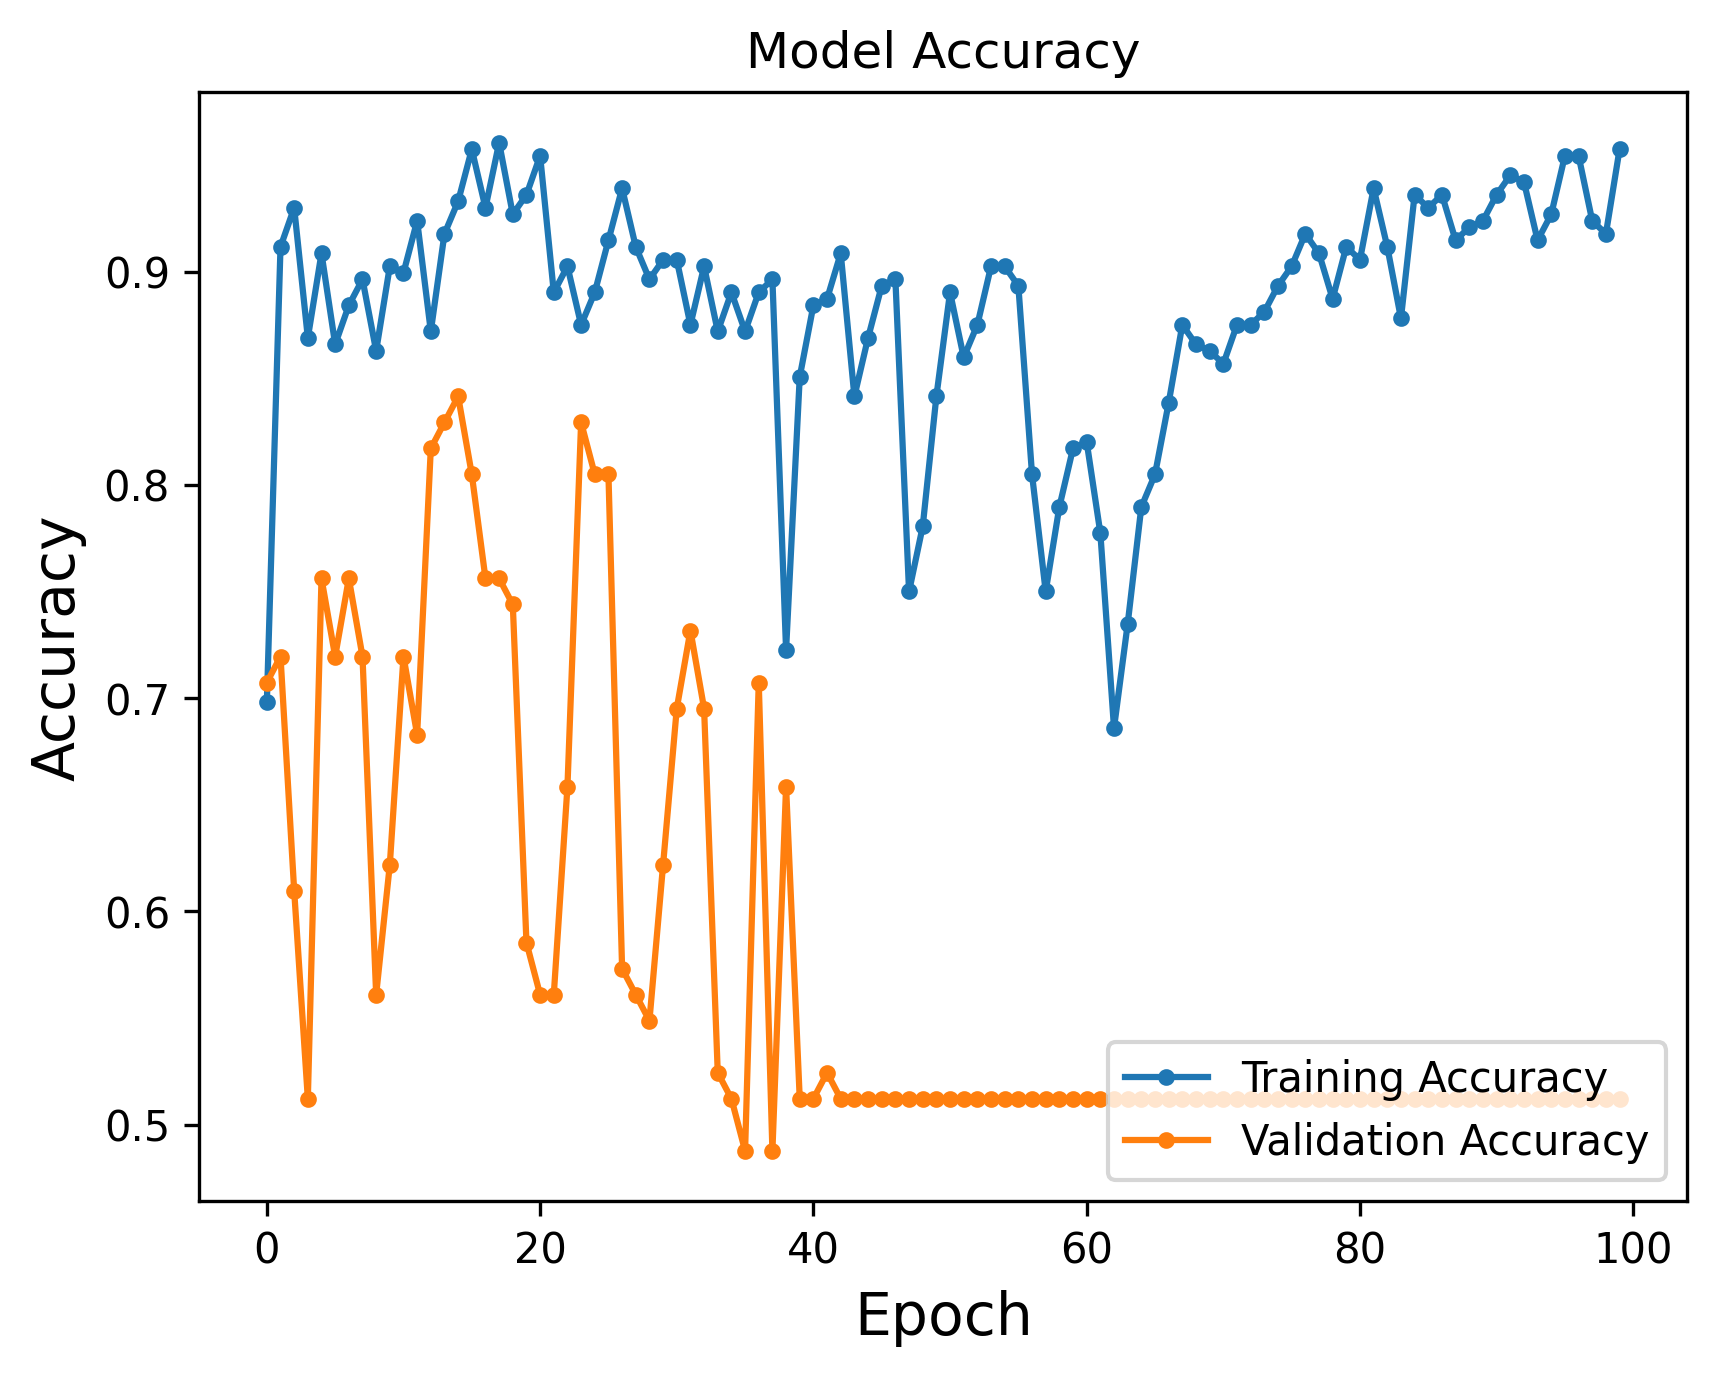

In [ ]:
plt.plot(hist.history['accuracy'], marker =".")
plt.plot(hist.history['val_accuracy'], marker= ".")
plt.title('Model Accuracy')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.rcParams['figure.dpi']=300
plt.show()

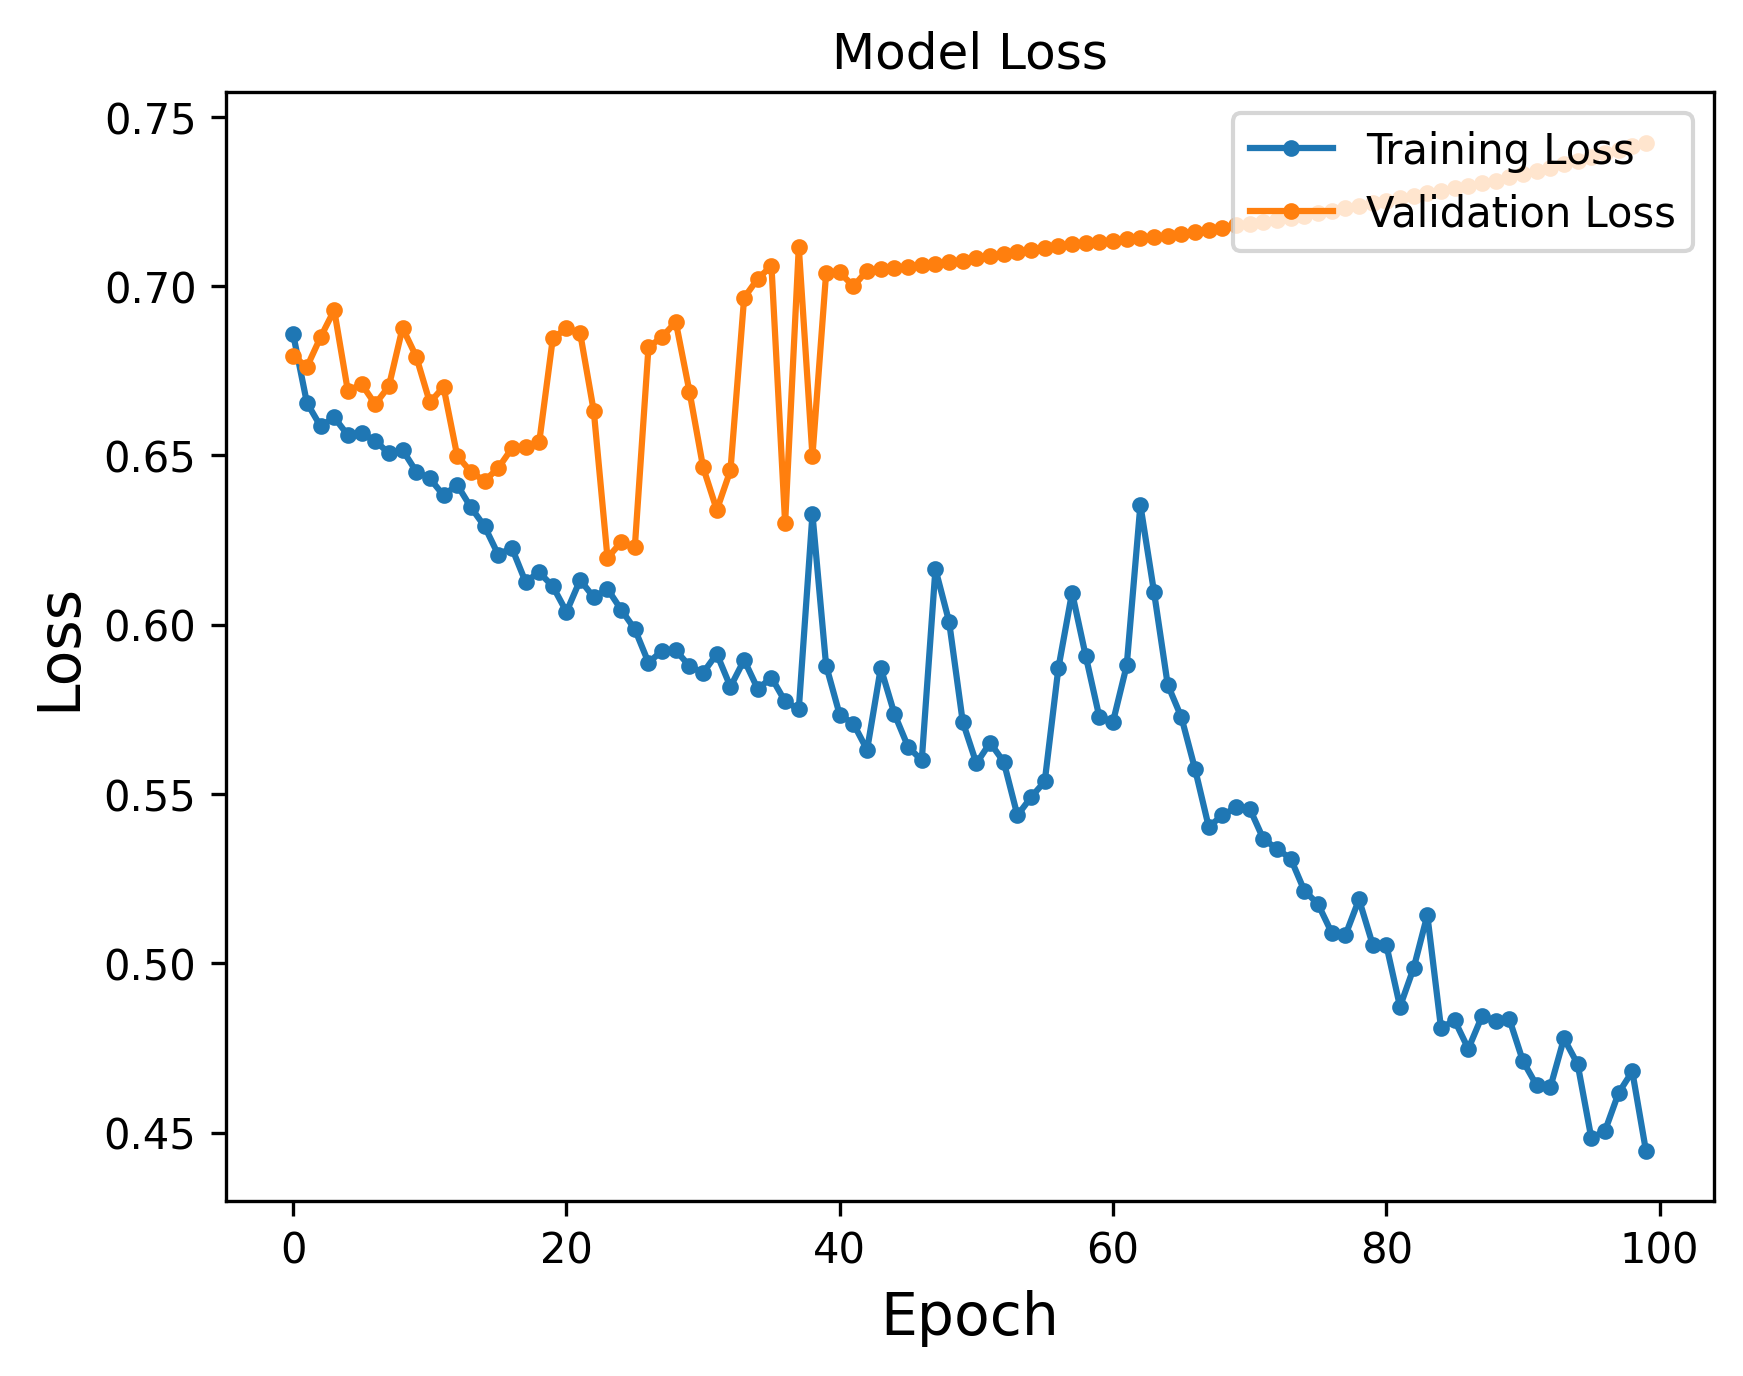

In [ ]:
plt.plot(hist.history['loss'], marker =".")
plt.plot(hist.history['val_loss'], marker= ".")
plt.title('Model Loss')
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.rcParams['figure.dpi']=300
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16
#import tensorlow as tf
from keras.optimizers import Adam
rmodel = keras.applications.ResNet101()
new1_model=Sequential()
new1_model.add(rmodel)
new1_model.add(Dropout(0.5))
new1_model.add(Dense(1,activation='sigmoid'))
new1_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

179648224/179648224 [==============================] - 5s 0us/step


In [ ]:
new1_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 1000)              44707176  
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 44708177 (170.55 MB)
Trainable params: 44602833 (170.15 MB)
Non-trainable params: 105344 (411.50 KB)
_________________________________________________________________


In [ ]:
#from Ipython.display import display
from PIL import Image
hist1=new1_model.fit(
    training_set,
    steps_per_epoch=training_set.samples//32,
    epochs=100,
    validation_data=test_set,
    validation_steps=test_set.samples//32)

Epoch 1/100
10/10 [==============================] - 109s 1s/step - loss: 0.6879 - accuracy: 0.5878 - val_loss: 0.6955 - val_accuracy: 0.4792
Epoch 2/100
10/10 [==============================] - 8s 885ms/step - loss: 0.6891 - accuracy: 0.5507 - val_loss: 0.6923 - val_accuracy: 0.5208
Epoch 3/100
10/10 [==============================] - 8s 821ms/step - loss: 0.6961 - accuracy: 0.4764 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 4/100
10/10 [==============================] - 7s 692ms/step - loss: 0.6906 - accuracy: 0.5169 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 7s 676ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.6964 - val_accuracy: 0.4688
Epoch 6/100
10/10 [==============================] - 8s 707ms/step - loss: 0.6898 - accuracy: 0.5135 - val_loss: 0.6901 - val_accuracy: 0.5417
Epoch 7/100
10/10 [==============================] - 8s 787ms/step - loss: 0.6942 - accuracy: 0.5169 - val_loss: 0.6958 - val_accuracy: 0.4896


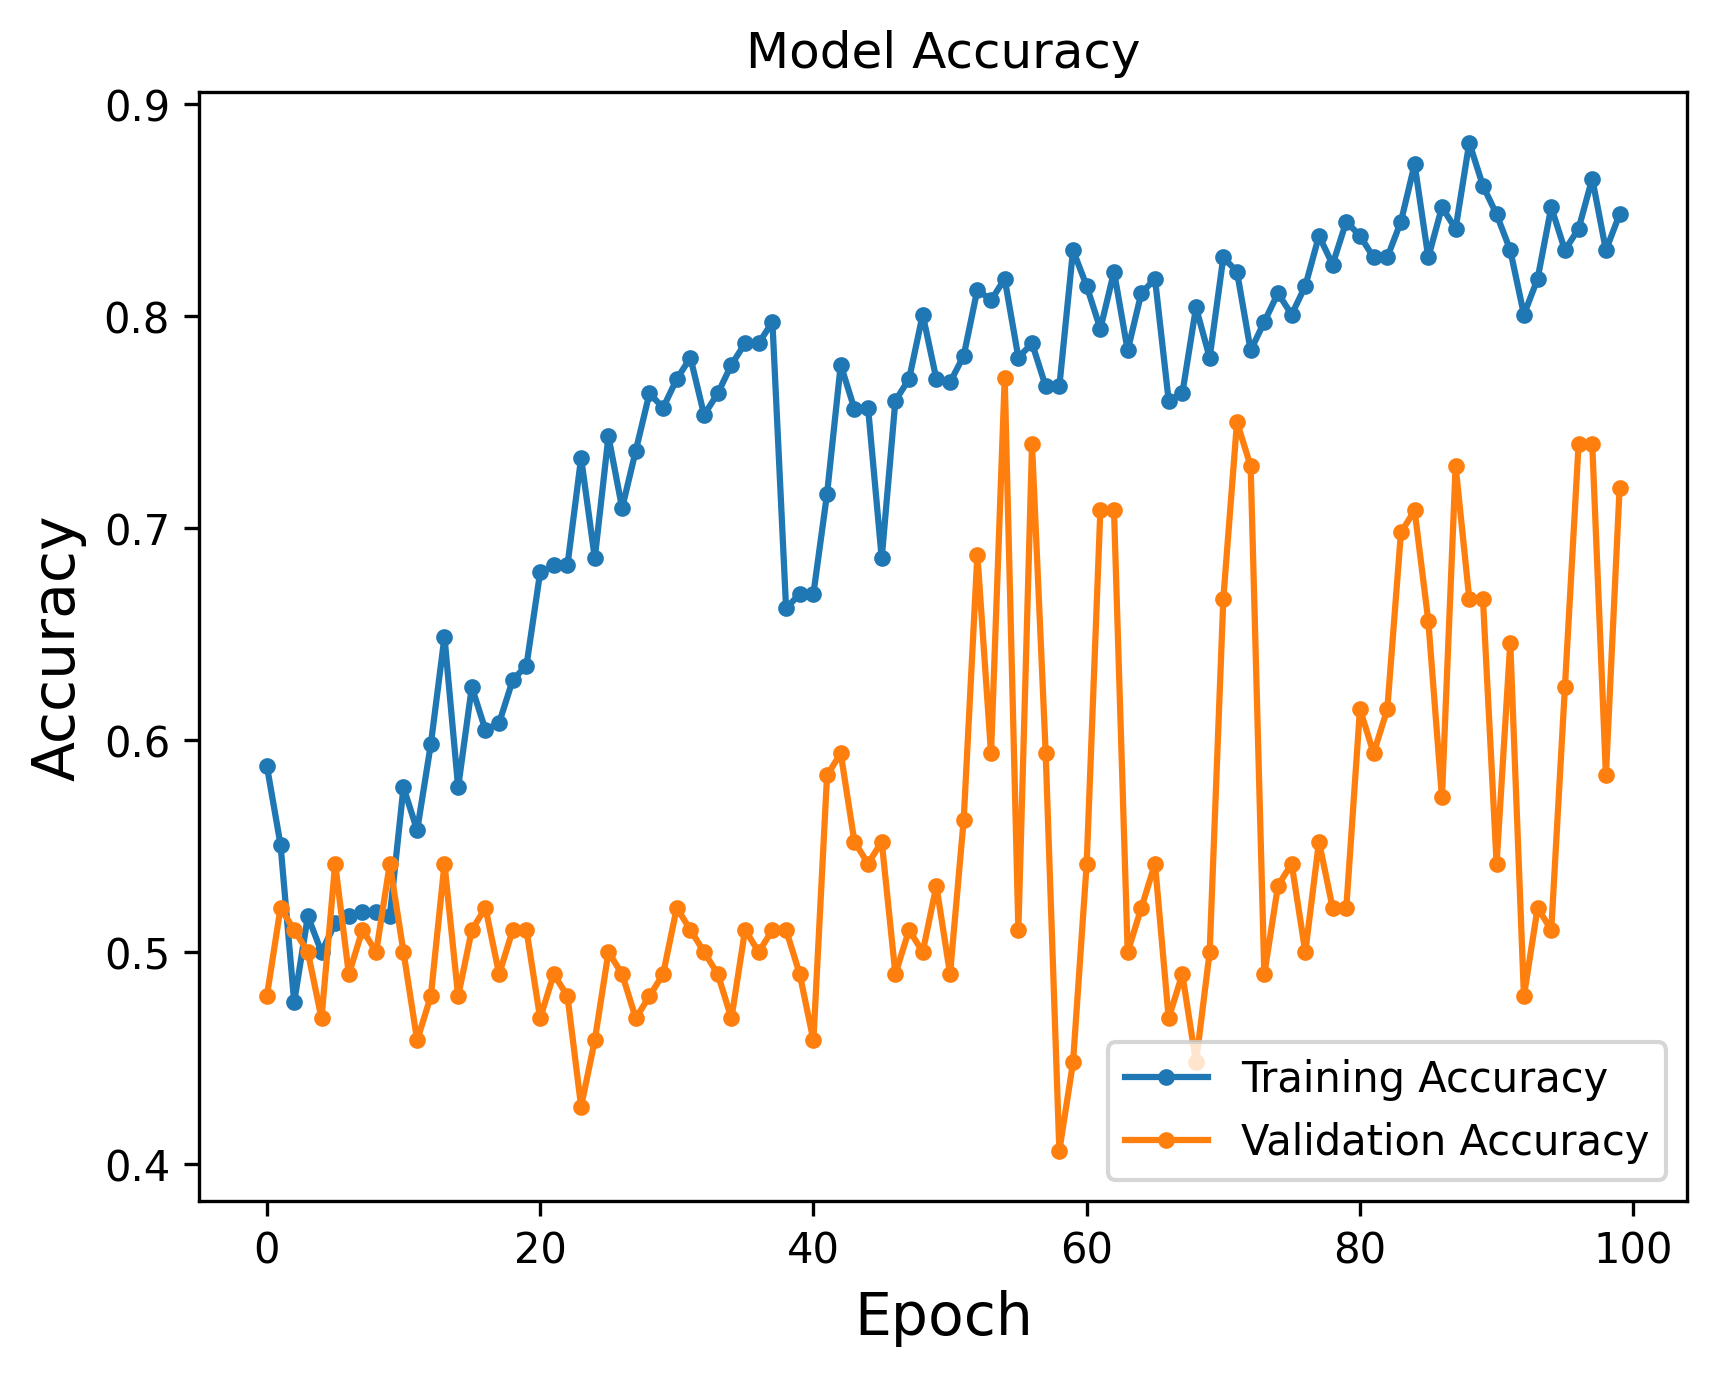

In [ ]:
plt.plot(hist1.history['accuracy'], marker =".")
plt.plot(hist1.history['val_accuracy'], marker= ".")
plt.title('Model Accuracy')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.rcParams['figure.dpi']=300
plt.show()

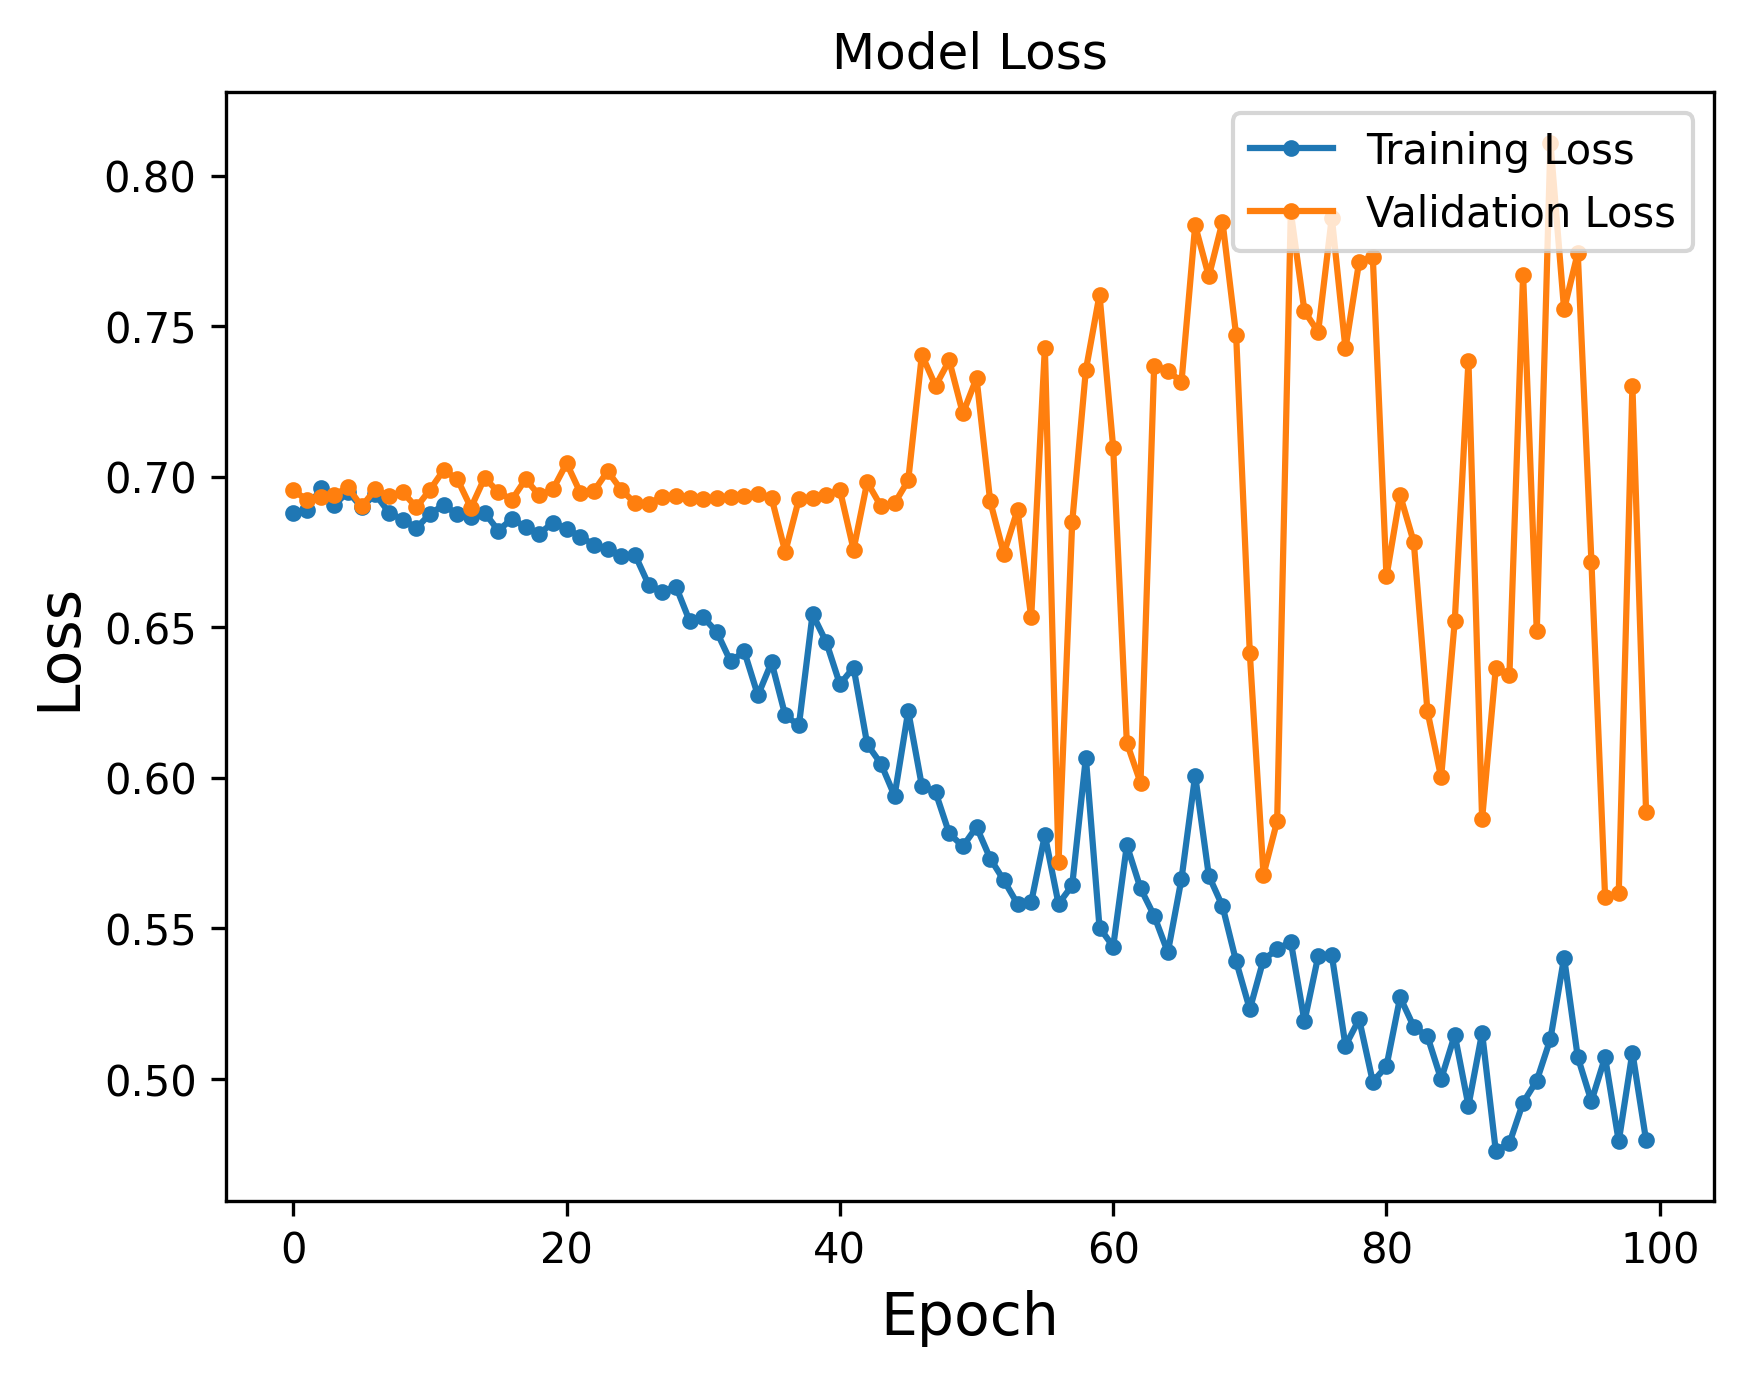

In [ ]:
plt.plot(hist1.history['loss'], marker =".")
plt.plot(hist1.history['val_loss'], marker= ".")
plt.title('Model Loss')
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.rcParams['figure.dpi']=300
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16
#import tensorlow as tf
from keras.optimizers import Adam
rmodel = keras.applications.ResNet101()
new1_model=Sequential()
new1_model.add(rmodel)
new1_model.add(Dense(1,activation='sigmoid'))
new1_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
new1_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 1000)              44707176  
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 44708177 (170.55 MB)
Trainable params: 44602833 (170.15 MB)
Non-trainable params: 105344 (411.50 KB)
_________________________________________________________________


In [ ]:
#from Ipython.display import display
from PIL import Image
hist=new1_model.fit(
    training_set,
    #steps_per_epoch=training_set.samples//32,
    epochs=50,
    validation_data=test_set)
    #validation_steps=test_set.samples//32)

Epoch 1/50
2/2 [==============================] - 71s 4s/step - loss: 0.6924 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 2s 916ms/step - loss: 0.6836 - accuracy: 0.7222 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 2s 931ms/step - loss: 0.6845 - accuracy: 0.7037 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 2s 624ms/step - loss: 0.6751 - accuracy: 0.7963 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 2s 629ms/step - loss: 0.6744 - accuracy: 0.7593 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 2s 964ms/step - loss: 0.6698 - accuracy: 0.8519 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 0.6693 - accuracy: 0.8519 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 8/50
2/2 [=========

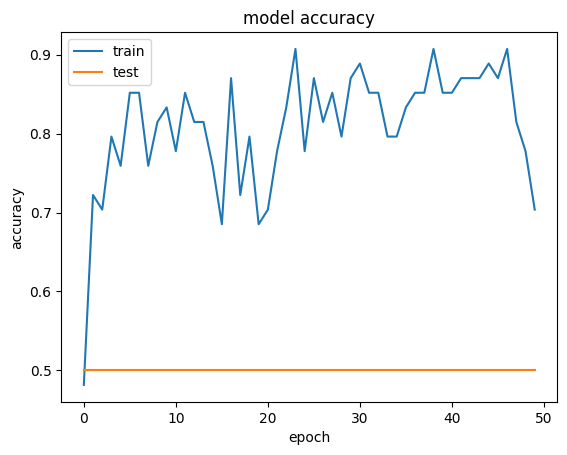

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

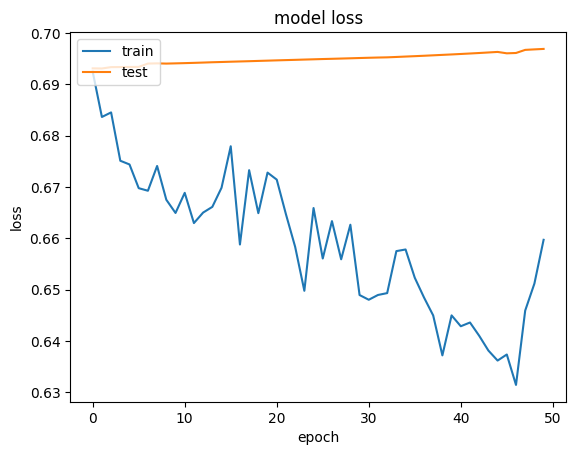

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Make predictions on the testing set
predictions = Model.predict(test_set)
y_pred = np.round(predictions).flatten()

6/6 [==============================] - 1s 161ms/step


In [ ]:
# Retrieve the true labels
y_true = test_set.classes

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_true, y_pred)

In [ ]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[52 34]
 [45 41]]


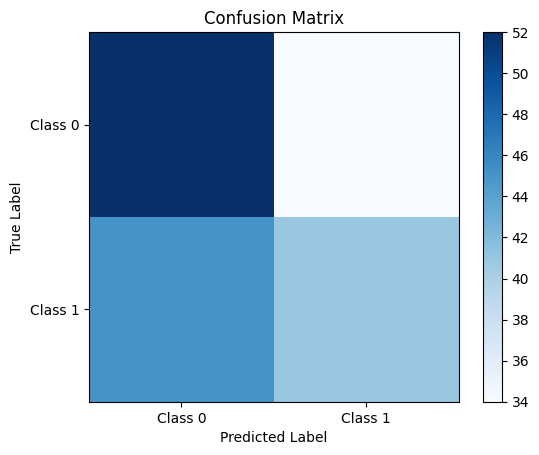

In [ ]:
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
#from Ipython.display import display
from PIL import Image
hist=model.fit(
    training_set,
    steps_per_epoch=training_set.samples//32,
    epochs=10,
    validation_data=test_set,
    validation_steps=test_set.samples//32)

Epoch 1/10


InvalidArgumentError: ignored

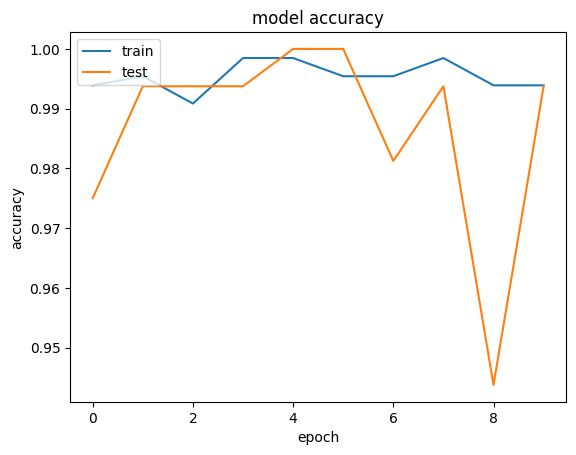

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

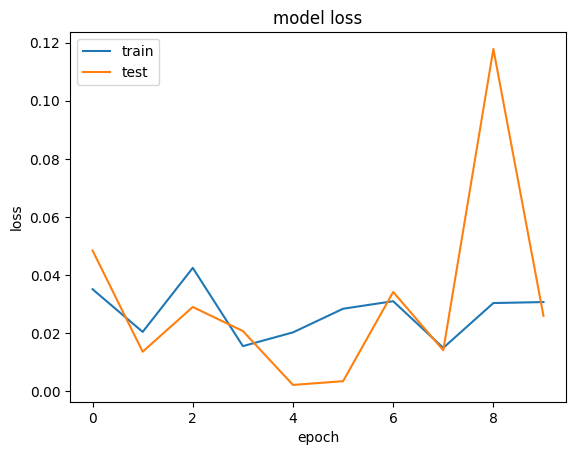

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[52 34]
 [45 41]]


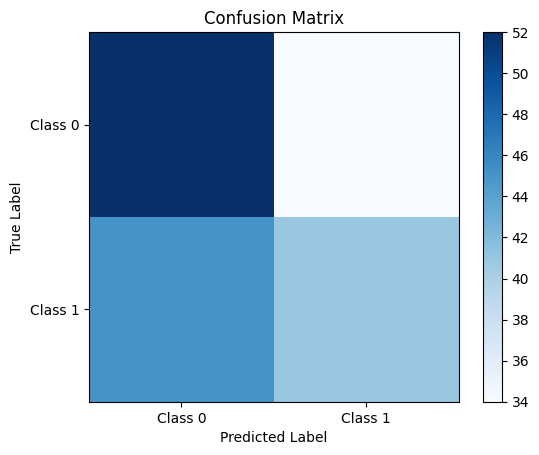

In [ ]:
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
# Load the pre-trained resnet50 model
model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
#from Ipython.display import display
from PIL import Image
hist=Model.fit(
    training_set,
    steps_per_epoch=training_set.samples//32,
    epochs=10,
    validation_data=test_set,
    validation_steps=test_set.samples//32)

Epoch 1/10
21/21 [==============================] - 18s 850ms/step - loss: 0.0122 - accuracy: 0.9985 - val_loss: 0.0160 - val_accuracy: 0.9937
Epoch 2/10
21/21 [==============================] - 18s 835ms/step - loss: 0.0133 - accuracy: 0.9985 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 3/10
21/21 [==============================] - 18s 835ms/step - loss: 0.0172 - accuracy: 0.9985 - val_loss: 7.9596e-04 - val_accuracy: 1.0000
Epoch 4/10
21/21 [==============================] - 18s 840ms/step - loss: 0.0161 - accuracy: 0.9985 - val_loss: 0.0104 - val_accuracy: 0.9937
Epoch 5/10
21/21 [==============================] - 18s 836ms/step - loss: 0.0151 - accuracy: 0.9985 - val_loss: 0.0208 - val_accuracy: 0.9875
Epoch 6/10
21/21 [==============================] - 18s 835ms/step - loss: 0.0153 - accuracy: 0.9985 - val_loss: 0.0341 - val_accuracy: 0.9875
Epoch 7/10
21/21 [==============================] - 19s 892ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0212 - val_accuracy: 0.

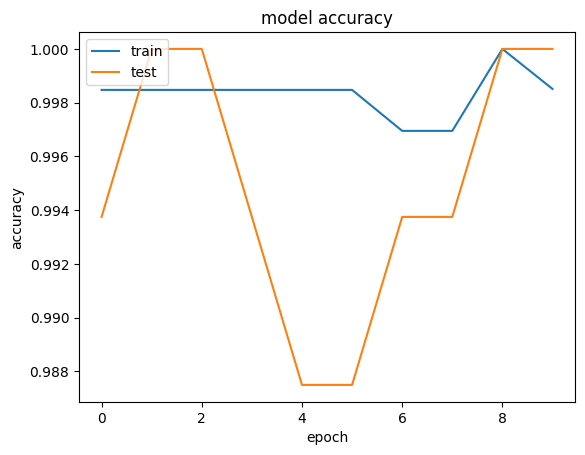

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

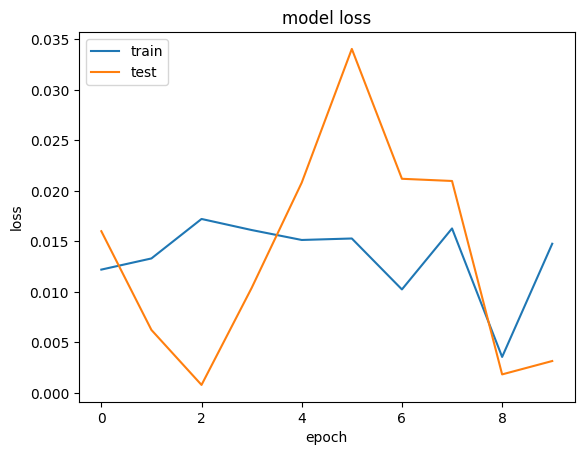

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()